## Class

In [1]:
import networkx as nx 

In [2]:
class graph():
	def __init__(self):
		"""
		description:
			Inizialization of an empty graph (the graph() class implements 
			the graphs as dictionaries).
		syntax:
			g = graph()
		"""
		self._vertices = {}

	def insert_vertex(self, v):
		""" 
		description:
			Insert a vertex v to the graph, it adds an entry 
			corresponding to v in the dictionary.
		syntax:
			g.insert_vertex(v)	
		"""
		if v not in self._vertices:
			self._vertices[v] = set()
	def remove_vertex(self, v):
		""" 
		description:
			Remove a vertex v to the graph, it removes the entry 
			corresponding to v in the dictionary.
		syntax:
			g.remove_vertex(v)	
		"""
		self._vertices.pop(v, None)
		for u in self._vertices:
			self._vertices[u].discard(v)
	def insert_edge(self, edge, weight):
		""" 
		description:
			Add an edge to the graph, it assumes that edge is of type tuple.
		syntax:
			g.insert_edge(edge, weight)
		"""
		weight = float(weight)
		u, v = tuple(edge)
		self.insert_vertex(u)
		self.insert_vertex(v)
		self._vertices[u].add((v, weight))
	def remove_edge(self, edge):
		""" 
		description:
			Remove an edge from the graph, it assumes that edge is of type tuple.
		syntax:
			g.remove_edge(edge, weight)
		"""
		u, v = tuple(edge)
		for vertex in self._vertices[u]:
			if vertex[0] == v:
					self._vertices[u].discard(vertex)
					return

	def vertices(self):
		""" 
		description:
			Returns a list containing all the vertices of the graph.
		syntax:
			g.vertices()
		"""
		return list(self._vertices.keys())
	def edges(self):
		""" 
		description:
			Returns a set of tuples containing all the edges of the graph.
			Each tuple is a triple: (source, destination, weight).
		syntax:
			g.edges()
		"""
		_edges = set()
		for u in self._vertices:
			for v in self._vertices[u]:
				_edges.add((u, v[0], v[1]))
		return _edges
	def incident_edges(self, u):
		""" 
		description:
			Returns a set of tuples containing all the edges inciddent on 
			a vertex. Each tuple is a triple: (source, destination, weight).
		syntax:
			g.incident_edges(v)
		"""
		_incident_edges = set()
		if u in self._vertices:
			for v in self._vertices[u]:
				_incident_edges.add((u, v[0], v[1]))
		return _incident_edges

	def neighbours(self, v):
		""" 
		description:
			Returns a set containing the neighbours of a vertex v (tuples).
		syntax:
			g.neighbours(v)
		"""
		if v in self._vertices:
			return self._vertices[v]
		return set()
	def check_adjacent(self, u, v):		
		""" 
		description:
			Check whether the vertices u and v are adjacent in the graph, 
			i.e. if exists an edge from u to v. Returns a boolean value.
		syntax:
			g.check_adjacent(u, v)
		"""
		if u not in self._vertices:
			return False
		for vertex in self._vertices[u]:
			if vertex[0] == v:
				return True
		return False

	def load(self, filename):
		""" 
		description:
			Load graph from source file (filename), correctly formatted, i.e.
			one line per edge, each line is supposed to be composed as follows:
			"u v weight".
		syntax:
			g.load(filename)
		"""
		with open(filename) as file:
			lines = file.readlines()
		for i in range(len(lines)):
			u, v, weight = lines[i].split()
			self.insert_edge((int(u), int(v)), float(weight))

	def draw(self):
		""" 
		description:
			Draw the graph g.	
		syntax:
			g.draw()
		"""
		g_draw = nx.DiGraph()
		for e in self.edges():
			g_draw.add_edge(e[0], e[1], weight = e[2])  
		pos = nx.circular_layout(g_draw) 
		weight_labels = nx.get_edge_attributes(g_draw, "weight")
		arc_rad = 0.05
		nx.draw(g_draw, pos, with_labels = True, node_size = 600, node_color = "#00b4d9", connectionstyle = f"arc3, rad = {arc_rad}") 
		output = nx.draw_networkx_edge_labels(g_draw, pos, edge_labels = weight_labels, label_pos = 0.33)     
	def draw_path(self, path):
		""" 
		description:
			Draw a path in the graph g. The path is supposed to be a list
			of the vertices to traverse.
			E.g. path = [a, c, b, e].
		syntax:
			g.draw_path(path)
		"""
		g_draw = nx.DiGraph()
		for e in self.edges():
			g_draw.add_edge(e[0], e[1], weight = e[2])   
		edges_path = list(zip(path, path[1:]))
		pos = nx.circular_layout(g_draw) 
		weight_labels = nx.get_edge_attributes(g_draw, "weight")
		arc_rad = 0.05
		edge_colors = ["black" if not edge in edges_path else "red" for edge in g_draw.edges()]
		nx.draw(g_draw, pos, with_labels = True, node_size = 600, node_color = "#00b4d9", connectionstyle = f"arc3, rad = {arc_rad}", edge_color = edge_colors) 
		output = nx.draw_networkx_edge_labels(g_draw, pos, edge_labels = weight_labels, label_pos = 0.33)  

In [3]:
g = graph()
graph_file = "graph_0"
g.load("graphs/" + graph_file + ".g")

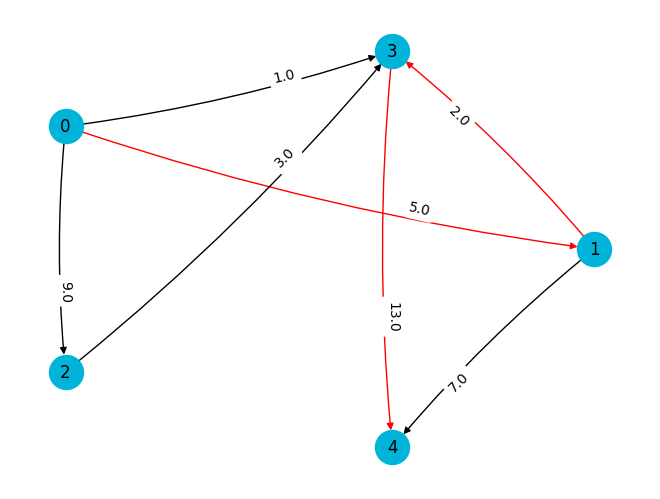

In [4]:
# g.draw()
g.draw_path([0, 1, 3, 4])